In [292]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

Data Understanding and Exploration

In [293]:
train_data = pd.read_csv(r"C:\Users\malli\Downloads\DS_ML Coding Challenge Dataset - Training Dataset.csv")
test_data = pd.read_csv(r"C:\Users\malli\Downloads\DS_ML Coding Challenge Dataset - Test Dataset.csv")
print(train_data)
print(test_data)

       ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0             NTM3           X1       A28        WHOLESALE        Large   
1             NTM2           X1        A9           DIRECT        Large   
2             NTM3           X2       A20           DIRECT        Large   
3             NTM3           X1       A18        WHOLESALE        Small   
4             NTM2           X1       A28           DIRECT        Large   
...            ...          ...       ...              ...          ...   
550171        NTM2           X1        A5           DIRECT        Large   
550172        NTM3           X1       A14           DIRECT        Large   
550173        NTM2           X1        A5           DIRECT        Small   
550174        NTM2           X1        A7           DIRECT        Small   
550175        NTM1           X1        A3           DIRECT        Small   

       Product Type Month of Sourcing  Sourcing Cost  
0            Powder            May-21       

In [294]:
train_data.shape
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB


In [295]:
test_data.shape
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductType        96 non-null     object 
 1   Manufacturer       96 non-null     object 
 2   Area Code          96 non-null     object 
 3   Sourcing Channel   96 non-null     object 
 4   Product Size       96 non-null     object 
 5   Product Type       96 non-null     object 
 6   Month of Sourcing  96 non-null     object 
 7   Sourcing Cost      96 non-null     float64
dtypes: float64(1), object(7)
memory usage: 6.1+ KB


Checking for duplicates in the dataset

In [296]:
train_data=train_data.drop_duplicates()
train_data.shape

(7380, 8)

In [297]:
test_data=test_data.drop_duplicates()
test_data.shape

(96, 8)

Checking for missing values in the dataset.

In [298]:
train_data.isna().sum()
test_data.isna().sum() 

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

Sorting the ProductType alphabetically 

In [299]:
train_data = train_data.sort_values(by='ProductType')
print(train_data)

       ProductType Manufacturer Area Code Sourcing Channel Product Size  \
139626        NTM1           X2       A12           DIRECT        Large   
138833        NTM1           X1        A3           DIRECT        Large   
138834        NTM1           X1       A11           DIRECT        Large   
138835        NTM1           X1        A3           DIRECT        Small   
138836        NTM1           X1        A8           DIRECT        Large   
...            ...          ...       ...              ...          ...   
140514        NTM3           X1       A28           DIRECT        Small   
140525        NTM3           X1       A25           RETAIL        Large   
140530        NTM3           X1       A28           DIRECT        Small   
140381        NTM3           X1       A44           DIRECT        Small   
549942        NTM3           X1       A35           DIRECT   ExtraLarge   

       Product Type Month of Sourcing  Sourcing Cost  
139626       Powder            May-21       

Converting the datatypes of the columns into a easier to handle form

In [300]:
train_data.dtypes

ProductType           object
Manufacturer          object
Area Code             object
Sourcing Channel      object
Product Size          object
Product Type          object
Month of Sourcing     object
Sourcing Cost        float64
dtype: object

In [301]:
categorical_cols = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']
for col in categorical_cols:
    train_data[col] = train_data[col].astype('category')
    test_data[col] = test_data[col].astype('category')

In [302]:
train_data.dtypes
test_data.dtypes

ProductType          category
Manufacturer         category
Area Code            category
Sourcing Channel     category
Product Size         category
Product Type         category
Month of Sourcing    category
Sourcing Cost         float64
dtype: object

In [303]:
train_data.describe

<bound method NDFrame.describe of        ProductType Manufacturer Area Code Sourcing Channel Product Size  \
139626        NTM1           X2       A12           DIRECT        Large   
138833        NTM1           X1        A3           DIRECT        Large   
138834        NTM1           X1       A11           DIRECT        Large   
138835        NTM1           X1        A3           DIRECT        Small   
138836        NTM1           X1        A8           DIRECT        Large   
...            ...          ...       ...              ...          ...   
140514        NTM3           X1       A28           DIRECT        Small   
140525        NTM3           X1       A25           RETAIL        Large   
140530        NTM3           X1       A28           DIRECT        Small   
140381        NTM3           X1       A44           DIRECT        Small   
549942        NTM3           X1       A35           DIRECT   ExtraLarge   

       Product Type Month of Sourcing  Sourcing Cost  
139626    

In [304]:
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(train_data[col].unique())
    print(f"\nValue counts for '{col}':")
    print(train_data[col].value_counts())


Unique values in 'ProductType':
['NTM1', 'NTM2', 'NTM3']
Categories (3, object): ['NTM1', 'NTM2', 'NTM3']

Value counts for 'ProductType':
ProductType
NTM2    3086
NTM1    2225
NTM3    2069
Name: count, dtype: int64

Unique values in 'Manufacturer':
['X2', 'X1', 'X3']
Categories (3, object): ['X1', 'X2', 'X3']

Value counts for 'Manufacturer':
Manufacturer
X1    5334
X2    1863
X3     183
Name: count, dtype: int64

Unique values in 'Area Code':
['A12', 'A3', 'A11', 'A8', 'A1', ..., 'A13', 'A24', 'A14', 'A18', 'A20']
Length: 45
Categories (45, object): ['A1', 'A10', 'A11', 'A12', ..., 'A6', 'A7', 'A8', 'A9']

Value counts for 'Area Code':
Area Code
A44    797
A28    536
A3     438
A8     411
A7     380
A11    372
A35    371
A25    365
A32    277
A10    243
A21    224
A2     210
A22    183
A29    179
A31    175
A18    137
A4     130
A12    126
A16    125
A38    121
A9     121
A6     113
A45    105
A13    102
A1      97
A5      94
A20     92
A19     89
A15     88
A42     75
A37     73
A2

Exploratory Data Analysis using bar plots and box plots

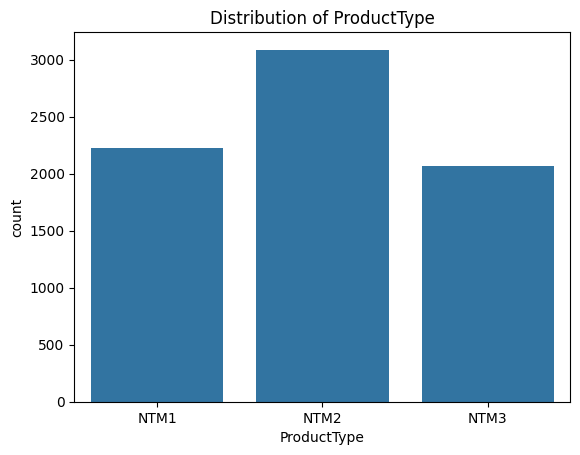

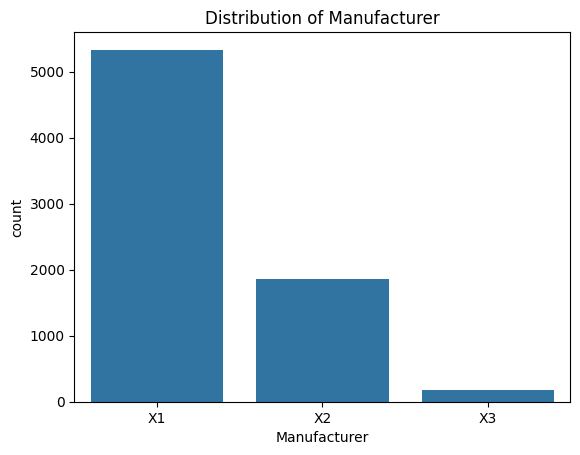

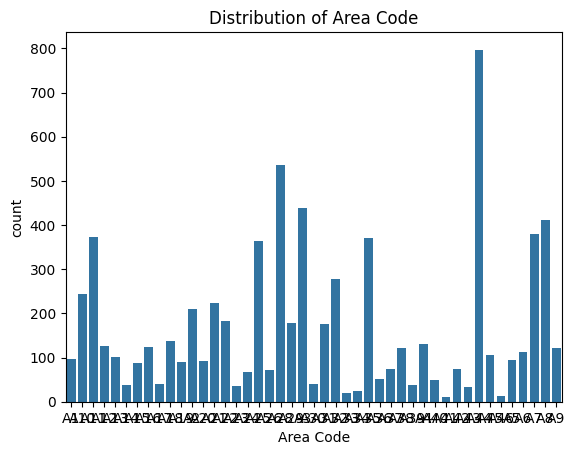

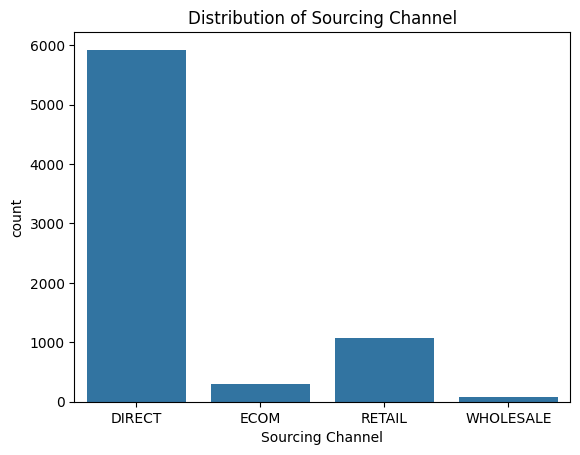

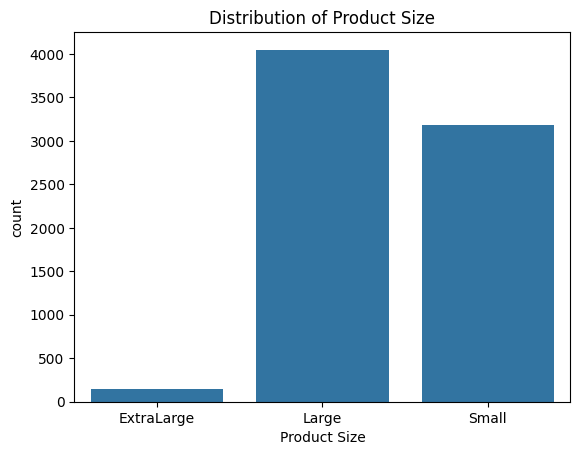

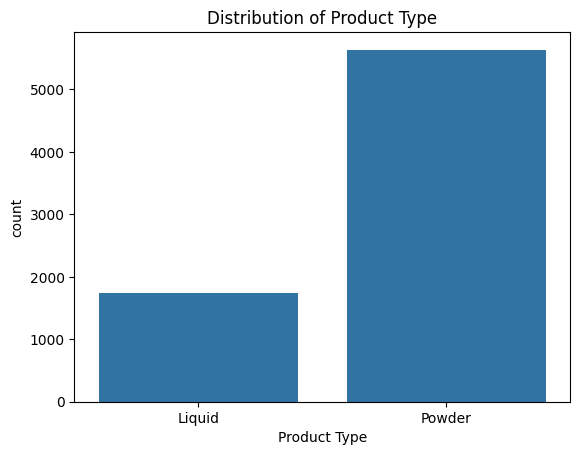

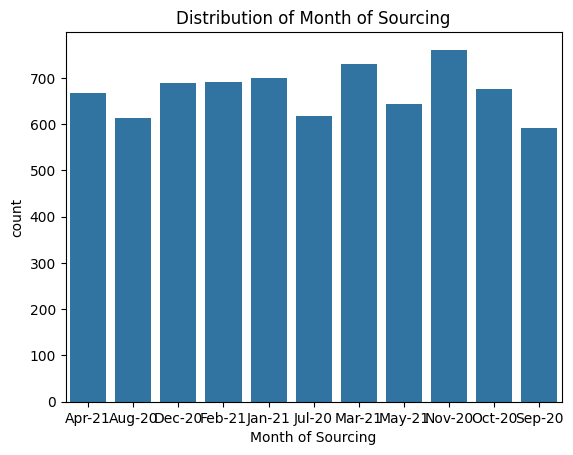

In [305]:
## Visualizing Features
for col in categorical_cols:
    plt.figure()
    sns.countplot(data=train_data, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()

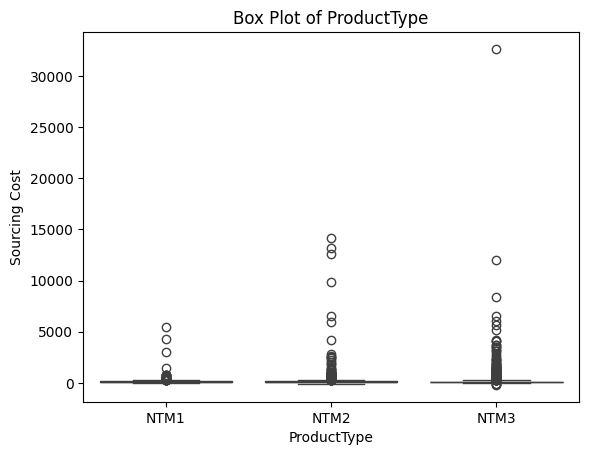

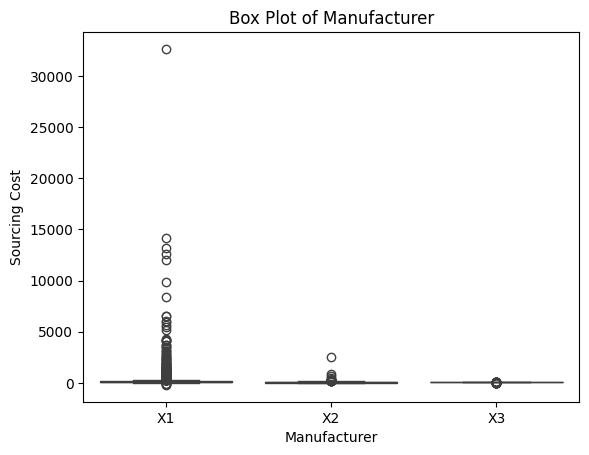

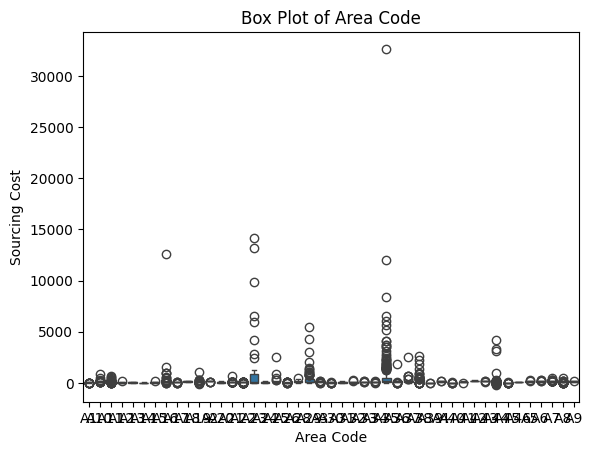

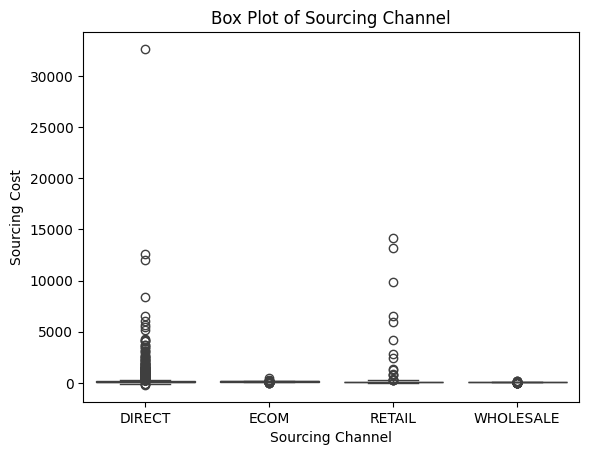

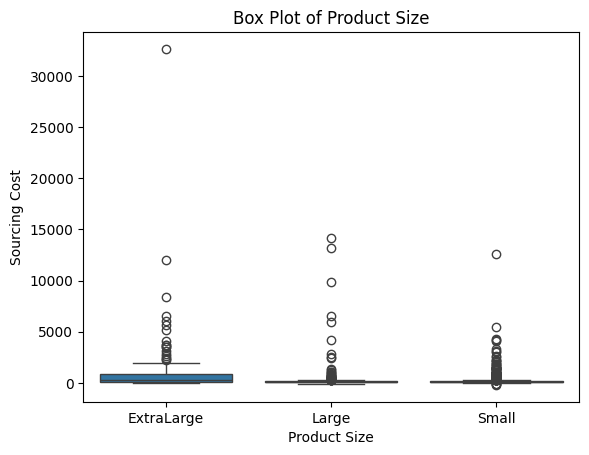

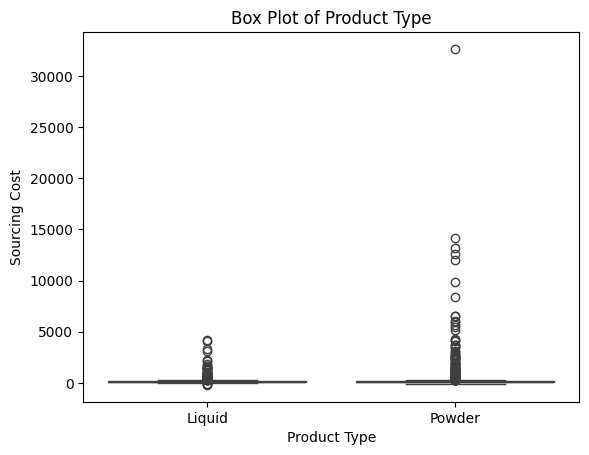

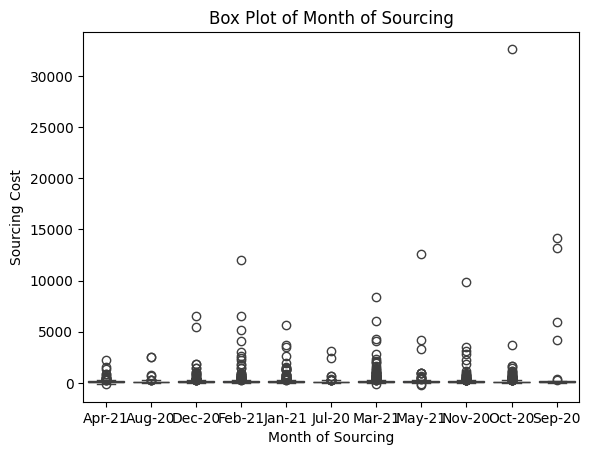

In [306]:
for col in categorical_cols:
    plt.figure()
    sns.boxplot(data=train_data, x=col, y="Sourcing Cost")
    plt.title(f"Box Plot of {col}")
    plt.show()

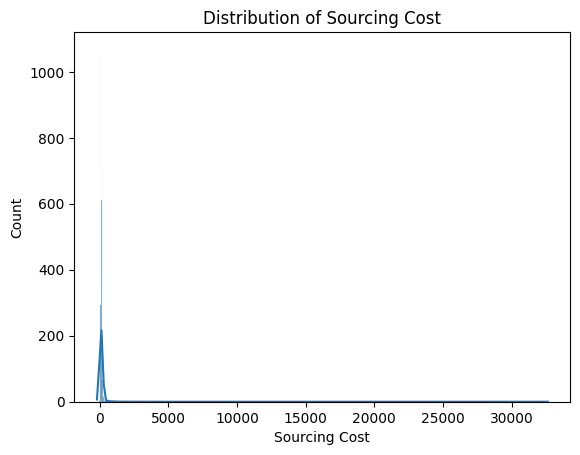

In [307]:
plt.figure()
sns.histplot(data=train_data, x="Sourcing Cost", kde=True)
plt.title("Distribution of Sourcing Cost")
plt.show()

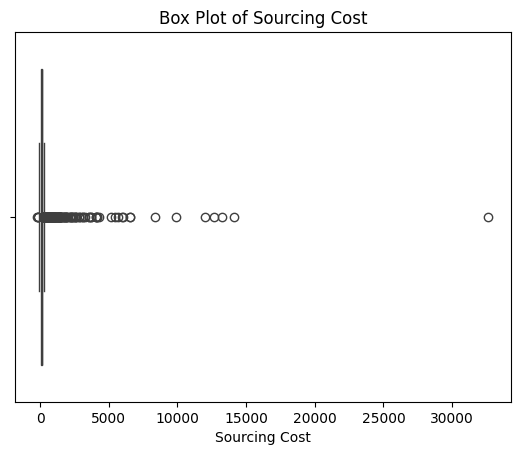

In [308]:
plt.figure()
sns.boxplot(data=train_data, x="Sourcing Cost")
plt.title("Box Plot of Sourcing Cost")
plt.show()

From above we can observe there are many exteme values that could be outiers 

In [309]:
train_data.shape

(7380, 8)

Dealing with outliers using IQR Method

In [310]:
# Step 1: Calculate the quartiles
percentile25 = train_data["Sourcing Cost"].quantile(0.25)
percentile75 = train_data["Sourcing Cost"].quantile(0.75)

# Step 2: Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Step 3: Finding the upper and lower limits
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Step 4: Finding outliers
outliers_high = train_data[train_data["Sourcing Cost"] > upper_limit]
outliers_low = train_data[train_data["Sourcing Cost"] < lower_limit]

# Step 5: Trimming outliers
train_data = train_data[(train_data["Sourcing Cost"] > lower_limit) & (train_data["Sourcing Cost"] < upper_limit)]
print(train_data)

       ProductType Manufacturer Area Code Sourcing Channel Product Size  \
139626        NTM1           X2       A12           DIRECT        Large   
138833        NTM1           X1        A3           DIRECT        Large   
138834        NTM1           X1       A11           DIRECT        Large   
138835        NTM1           X1        A3           DIRECT        Small   
138836        NTM1           X1        A8           DIRECT        Large   
...            ...          ...       ...              ...          ...   
140506        NTM3           X1       A13           DIRECT        Large   
140514        NTM3           X1       A28           DIRECT        Small   
140525        NTM3           X1       A25           RETAIL        Large   
140530        NTM3           X1       A28           DIRECT        Small   
140381        NTM3           X1       A44           DIRECT        Small   

       Product Type Month of Sourcing  Sourcing Cost  
139626       Powder            May-21       

In [311]:
categorical_cols = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']
for col in categorical_cols:
    train_data[col] = train_data[col].astype('category')
    test_data[col] = test_data[col].astype('category')

C:\Users\malli\AppData\Local\Temp\ipykernel_3292\2866535195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[col] = train_data[col].astype('category')


Sourcing cost data after dealing with outliers

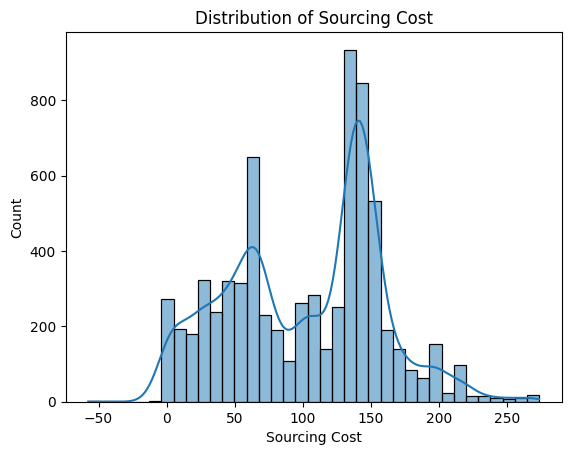

In [312]:
plt.figure()
sns.histplot(data=train_data, x="Sourcing Cost", kde=True)
plt.title("Distribution of Sourcing Cost")
plt.show()

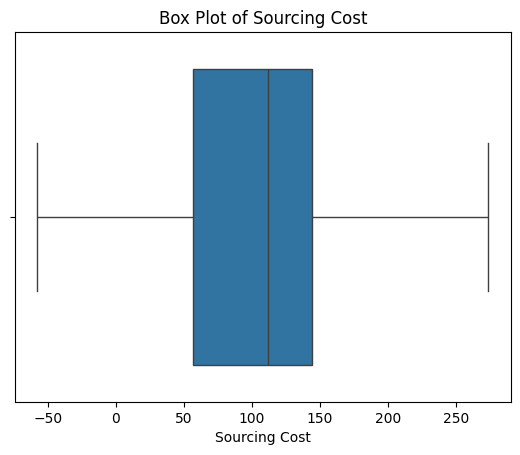

In [313]:
plt.figure()
sns.boxplot(data=train_data, x="Sourcing Cost")
plt.title("Box Plot of Sourcing Cost")
plt.show()

Data Preprocessing and Correlation Matrix

In [333]:
X_train = train_data.drop('Sourcing Cost', axis=1)
X_test = test_data.drop(['Sourcing Cost'], axis=1)


label_encoder = LabelEncoder()

for col in categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.fit_transform(X_test[col])

print(X_train)


        ProductType  Manufacturer  Area Code  Sourcing Channel  Product Size  \
139626            0             1          3                 0             1   
138833            0             0         21                 0             1   
138834            0             0          2                 0             1   
138835            0             0         21                 0             2   
138836            0             0         43                 0             1   
...             ...           ...        ...               ...           ...   
140506            2             0          4                 0             1   
140514            2             0         19                 0             2   
140525            2             0         17                 2             1   
140530            2             0         19                 0             2   
140381            2             0         37                 0             2   

        Product Type  Month of Sourcing

In [325]:
print(X_test)

    ProductType  Manufacturer  Area Code  Sourcing Channel  Product Size  \
0             0             0          0                 0             2   
1             0             0          1                 0             1   
2             0             0          1                 1             1   
3             0             0          2                 0             1   
4             0             0         11                 0             1   
..          ...           ...        ...               ...           ...   
91            2             0         37                 0             2   
92            2             0         43                 0             1   
93            2             0         43                 0             2   
94            2             1         12                 0             1   
95            2             2         14                 2             1   

    Product Type  Month of Sourcing  
0              1                  0  
1          

In [316]:
X_train.corr()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing
ProductType,1.000000,-0.103099,-0.087830,0.225122,0.112561,-0.070120,0.013232
Manufacturer,-0.103099,1.000000,-0.007175,0.367551,-0.078407,0.136792,-0.003405
Area Code,-0.087830,-0.007175,1.000000,-0.025978,-0.030153,-0.269909,0.015126
Sourcing Channel,0.225122,0.367551,-0.025978,1.000000,-0.048128,0.183813,-0.007655
Product Size,0.112561,-0.078407,-0.030153,-0.048128,1.000000,0.098294,-0.002848
Product Type,-0.070120,0.136792,-0.269909,0.183813,0.098294,1.000000,-0.010755
Month of Sourcing,0.013232,-0.003405,0.015126,-0.007655,-0.002848,-0.010755,1.000000


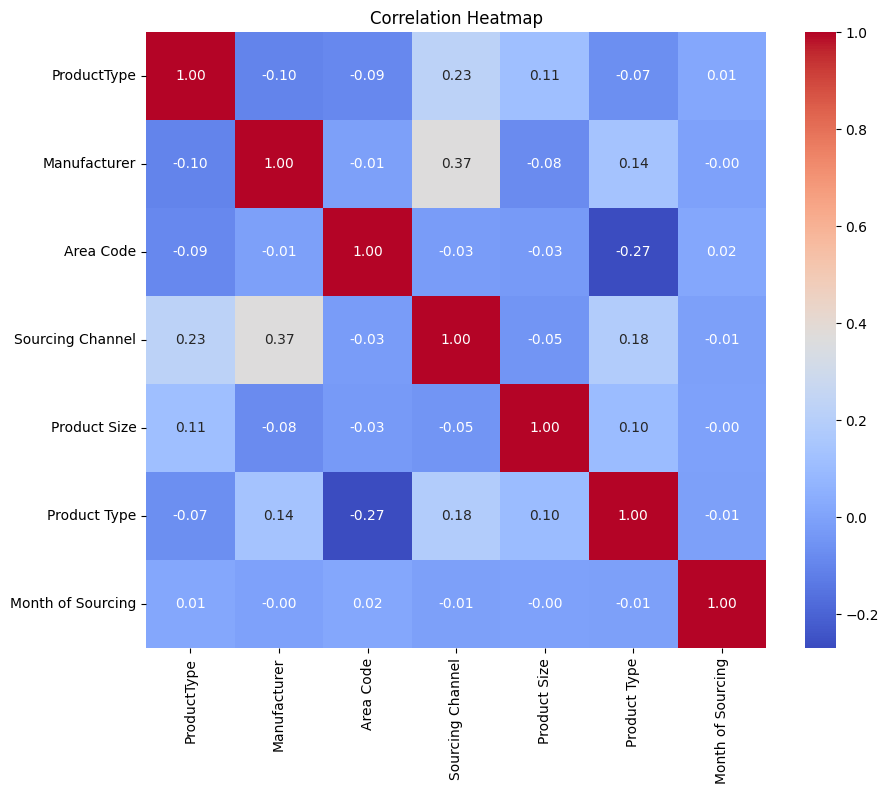

In [317]:
# Calculate the correlation matrix
corr_matrix = X_train.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

From the correlation matrix we can conclude linear regression cannot be used in this senario at all since none of the features really have a good linear realtion with eachother 

Feature Engineering

Creating more features with existing features using one hot encoding so that the model has more features to learn from.

In [337]:
print(X_train.columns)

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing'],
      dtype='object')


In [338]:
print(X_test.columns)

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing'],
      dtype='object')


In [340]:
X_train = pd.get_dummies(X_train,columns=['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type'])
print(X_train)

        Month of Sourcing  ProductType_0  ProductType_1  ProductType_2  \
139626                  7           True          False          False   
138833                  1           True          False          False   
138834                  2           True          False          False   
138835                  4           True          False          False   
138836                 10           True          False          False   
...                   ...            ...            ...            ...   
140506                  9          False          False           True   
140514                  0          False          False           True   
140525                  2          False          False           True   
140530                  5          False          False           True   
140381                  2          False          False           True   

        Manufacturer_0  Manufacturer_1  Manufacturer_2  Area Code_0  \
139626           False            True  

In [339]:
X_test = pd.get_dummies(X_test,columns=['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type'])
print(X_test)

    Month of Sourcing  ProductType_0  ProductType_1  ProductType_2  \
0                   0           True          False          False   
1                   0           True          False          False   
2                   0           True          False          False   
3                   0           True          False          False   
4                   0           True          False          False   
..                ...            ...            ...            ...   
91                  0          False          False           True   
92                  0          False          False           True   
93                  0          False          False           True   
94                  0          False          False           True   
95                  0          False          False           True   

    Manufacturer_0  Manufacturer_1  Manufacturer_2  Area Code_0  Area Code_1  \
0             True           False           False         True        False   

In [341]:
y_train = train_data['Sourcing Cost'] 
y_test = test_data['Sourcing Cost'] 

Machine Learning Algorithms 

For our scenario here, where we want to predict the sourcing cost for a month not present in the training set, we will be using algorithms like Random Forest, Gradient Boosting Regressor (XGBoost), or Support Vector Machine Regressor. These algorithms are robust and handle categorical variables well, making them suitable for our dataset where most features are label coded and one hot encoded. Additionally, they generally perform well even when extrapolating to unseen data.

In [343]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=1000,random_state=0)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)

print("Random Forest Regressor:")
print("MAE:", mean_absolute_error(y_test, rf_predictions))
print("MSE:", mean_squared_error(y_test, rf_predictions))
print("R^2:", r2_score(y_test, rf_predictions))


Random Forest Regressor:
MAE: 18.629399074010383
MSE: 1096.1560651421914
R^2: 0.5959554005536342


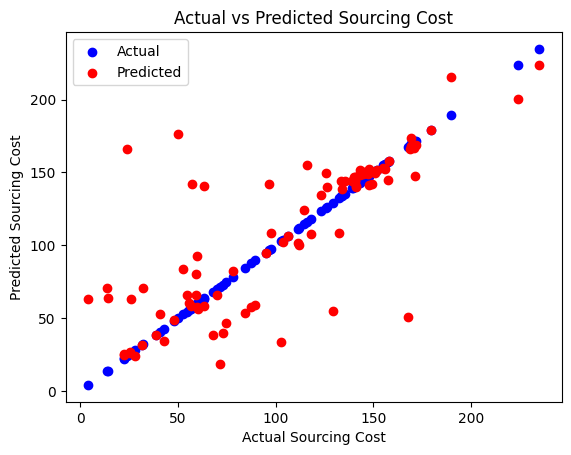

In [344]:
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, rf_predictions, color='red', label='Predicted')
plt.xlabel('Actual Sourcing Cost')
plt.ylabel('Predicted Sourcing Cost')
plt.title('Actual vs Predicted Sourcing Cost')
plt.legend()  
plt.show()

In [345]:
# Gradient Boosting Regressor (XGBoost)
xgb_regressor = XGBRegressor(random_state=42)
xgb_regressor.fit(X_train, y_train)
xgb_predictions = xgb_regressor.predict(X_test)

print("\nGradient Boosting Regressor (XGBoost):")
print("MAE:", mean_absolute_error(y_test, xgb_predictions))
print("MSE:", mean_squared_error(y_test, xgb_predictions))
print("R^2:", r2_score(y_test, xgb_predictions))


Gradient Boosting Regressor (XGBoost):
MAE: 18.781767923434575
MSE: 1201.0118888113673
R^2: 0.5573054029654392


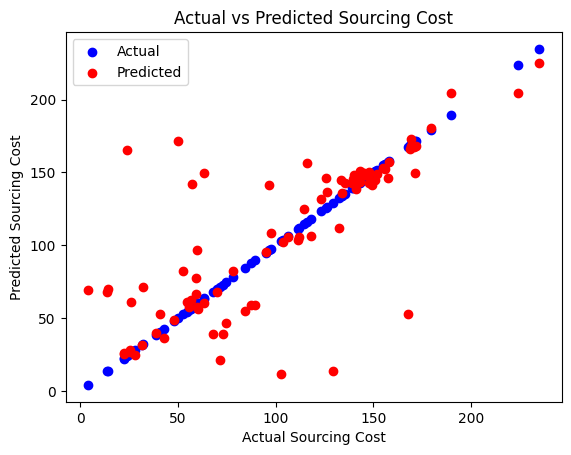

In [346]:
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, xgb_predictions, color='red', label='Predicted')
plt.xlabel('Actual Sourcing Cost')
plt.ylabel('Predicted Sourcing Cost')
plt.title('Actual vs Predicted Sourcing Cost')
plt.legend() 
plt.show()

In [347]:
# Support Vector Machine Regressor
svm_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_regressor.fit(X_train, y_train)
svm_predictions = svm_regressor.predict(X_test)

print("\nSupport Vector Machine Regressor:")
print("MAE:", mean_absolute_error(y_test, svm_predictions))
print("MSE:", mean_squared_error(y_test, svm_predictions))
print("R^2:", r2_score(y_test, svm_predictions))



Support Vector Machine Regressor:
MAE: 34.93918600677504
MSE: 2007.1626820664458
R^2: 0.26015713666280615


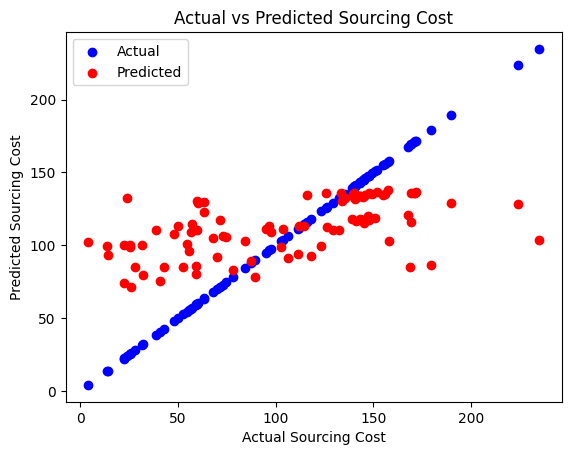

In [348]:
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, svm_predictions, color='red', label='Predicted')
plt.xlabel('Actual Sourcing Cost')
plt.ylabel('Predicted Sourcing Cost')
plt.title('Actual vs Predicted Sourcing Cost')
plt.legend()  
plt.show()

From the above three applied algorithms we can conclude that Random forest is the best performing and Support Vector Machine is the worst performing